## Análisis de datos con Bash y Python
### Librerías : Pandas, Numpy, Matplotlib
---

- Leemos un dataset bajado de Google Analytics
- Primero con herramientas de Bash, que vienen por defecto en cualquier distribución Linux
- Luego empezamos a trabajar con librerías de python

Importamos las librerías de Python necesarias para poder trabajar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Miramos el contenido del archivo crudo con el comando **cat** de Bash, pasa ver la cantidad de renglones que tiene el archivo, vemos 1197.  La primera selección, filtrado y limpieza de los datos lo hacemos con **Bash**, por rapidez y sencillez.  Es imprescindible saber el uso de 

- wc
- cut
- tr
- sed
- awk
- uniq
- grep
- sort
- head
- tail


Miramos el contenido del directorio Descargas, buscamos el archivo csv que corresponde, copiamos y pegamos el archivo que queremos leer.


In [2]:
!ls /home/marco/datasets/

agencias-viajes-20181012.csv
ingresos-por-habitacion-disponible-en-usd-por-categoria.csv
puestos-de-trabajo-equivalentes-totales-por-region-y-categoria.csv
serie-tiempo-parques-nacionales-mensual.csv
serie-tiempo-turismo-emisivo-mensual.csv
tarifa-media-diaria-en-usd-por-region-y-categoria.csv
tasas-de-ocupacion-habitacion-por-categoria.csv
turistas-residentes-serie-3.csv
visitas-residentes-y-no-residentes-por-region-3.csv


Con **cat** enviamos a la salida estandar el contenido del archivo, miramos la cantidad de renglones que tiene el sed de datos, para evaluar cuales tienen información válida y cuales valores nulos.  Después la salida estandar del comando anterior la enviamos con un pipe (|) a de esto con el comando **sed** eliminamos la cabecera y el final del archivo, quitando los renglones que "rompen" la tabla.

---
Definimos el archivo a leer y lo montamos como una variable

In [3]:
! datos='~/datasets/turistas-residentes-serie-3.csv'

In [5]:
# vemos la cantidad de renglones

! cat datos

cat: datos: No existe el fichero o el directorio


Miramos el **head** y el **tail** para ver como quitar los renglones sin valor

In [8]:
!cat ~/datasets/serie-tiempo-turismo-emisivo-mensual.csv | tail -20

2019-07,2516.4,51804.7,21686.3,6099.3,3986.4,59314.4,71509.4,81732.4,13199.7,41981.7,108349.3,64531,110852.4,43070,357.6,934.4,90.1,100.6,8983,5691,34,9347.9,33342.1,146.2,468.2,121.7,19.8
2019-08,4017.6,61865,21553.4,6404,4765.2,78309.4,72961.6,85405.7,12420,35969.9,62088.2,44088.7,80989,31261.8,172.6,289.1,31.7,32,8128.7,3349.4,30.8,8618.2,28809.1,193.9,1149.6,321.1,49.3
2019-09,2769.9,56089.7,19268.1,4873.3,4136.1,69581.6,61181.6,87365.5,14516.1,28480.6,57355,54339.9,62013.3,26770,205.5,646.7,106.8,59.3,6077,3800.1,16,8209,29433.4,25.8,154.2,38.9,6.6
2019-10,1847.3,56607.1,17060.9,4953.3,5042.2,69714.7,60576,81075.7,21569.9,24071.9,56774,58456,66725.5,31937.8,45.4,337.4,42.7,29.9,7510,3873,45,8942,32622,0,0,0,0
2019-11,1667.3,54239.8,13541.5,5241.2,5885.3,59631.3,60673.2,49370.9,17798.6,16857,53740.8,36849.5,98636.2,41799.5,47.5,327.2,47.7,34.2,5279,3854.1,111.9,8051.3,42381.6,123.9,737.6,187.1,0
2019-12,2032.6,55576.6,16021.8,4664.6,7260.2,51881.1,57744.4,37101.3,10859.5,23350.5,67

Cotamos los primeros renglones y los últimos para dejar solo los datos con valor, podemos enviarlos a un archivo filtrado con (>), escribimos en un archivo puntual también CSV, en este caso **14dec20.csv**

In [10]:
!cat '/home/marco/Descargas/Analytics Vista de Usuarios Vuelos por agencia sin DELFOS 20210125-20210131.csv' | sed -n '8,4104p' | tail

/es/zoluviajes/productos/detalle/43558/patagonia-magica-desde-comodoro-rivadavia?token=00000000-0000-0000-0000-000000000000,1,1,00:12:19,0,"0,00 %","0,00 %","0,00 US$"
/es/zoluviajes/productos/detalle/795/ushuaia-clasico,1,1,00:00:23,0,"0,00 %","0,00 %","0,00 US$"
"/es/zoluviajes/vuelos/resultados/BUE,SLA/TUC,BUE/04-04-2021,11-04-2021/?adultos=2&includeBaggage=true",1,1,00:00:00,0,"0,00 %","100,00 %","0,00 US$"
"/es/zoluviajes/vuelos/resultados/BUE,USH/RGA,BUE/30-01-2021,06-02-2021/?adultos=1",1,1,00:00:00,0,"0,00 %","100,00 %","0,00 US$"
/es/zoluviajes/vuelos/resultados/BUE/CRD/01-04-2021/08-04-2021?adultos=2,1,1,00:02:56,0,"0,00 %","0,00 %","0,00 US$"
/es/zonadepartida/hoteles/resultados/1537/0/cancuncosta-mujeres-mexico/28-01-2021/01-02-2021?h1=2,1,1,00:00:00,0,"0,00 %","100,00 %","0,00 US$"
/es/zoom/vuelos/resultados/BUE/USH/01-02-2021/11-02-2021?adultos=4&menores=CHD&includeBaggage=true&ff-dsd-org=04-02-2021&ff-hst-org=11-02-2021&ff-imp-org=174630.12907079997&ff-imp-sel=110143.514

### Ranking Vertical Delfos

**uso de**: grep cut sort uniq tr sed

La salida estandar de un comando (en este caso cat) es la entrada de otro (sed) y este es la salida de grep y así sucesivamente.

Esto se debe a la filosofía Linux de un comando tiene que hacer una sola cosa pero muy bien.

In [11]:
!cat '/home/marco/Descargas/Analytics Vista de Usuarios Vuelos por agencia sin DELFOS 20210125-20210131.csv' | sed -n '8,3869p' | tr '/|=|?' ',' | grep delfos | cut -d, -f4 | sort | uniq -c | sort -r

    660 hoteles
    114 vuelos
     40 productos
     15 cotizador-offline
      4 paquetes
      2 detalle-producto
      1 cupos


### Ranking Vertical Agencias


In [20]:
!cat '/home/marco/Descargas/Analytics Vista de Usuarios Vuelos por agencia sin DELFOS 20210125-20210131.csv' | sed -n '8,3869p' | tr '/|=|?' ',' | grep -v delfos | cut -d, -f4 | sort | uniq -c | sort -r

   1406 vuelos
   1361 hoteles
    173 productos
     73 cotizador-offline
      7 cupos
      6 paquetes


### Vuelos Delfos
los 20 destinos mas buscados

In [21]:
!cat '/home/marco/Descargas/Analytics Vista de Usuarios Vuelos por agencia sin DELFOS 20210125-20210131.csv' | sed -n '8,3869p' | tr '/|=|?' ',' | grep delfos | grep vuelos | cut -d, -f7 | sort | uniq -c | sort -r | head -20

     23 BRC
     21 CUN
     12 MDZ
      9 PUJ
      7 USH
      7 MAD
      5 RIO
      5 IGR
      5 FTE
      3 MIA
      3 MBJ
      3 MAA
      2 PEI
      2 NYC
      1 PTY
      1 NQN
      1 KIN
      1 FNH
      1 COR
      1 BUE


### Vuelos Agencias
Los 20 destinos mas buscados

In [22]:
!cat '/home/marco/Descargas/Analytics Vista de Usuarios Vuelos por agencia sin DELFOS 20210125-20210131.csv' | sed -n '8,3869p' | tr '/|=|?' ',' | grep -v delfos | grep vuelos | cut -d, -f7 | sort | uniq -c | sort -r | head -20

    231 CUN
    168 BRC
    166 PUJ
     63 BUE
     55 SLA
     55 FTE
     48 USH
     45 MDZ
     35 MAD
     31 MDQ
     28 IGR
     27 SCL
     26 RIO
     23 FLN
     22 COR
     21 PSS
     19 SNU
     16 MBJ
     16 HAV
     15 CTG


### Hoteles Delfos

In [23]:
!cat '/home/marco/Descargas/Analytics Vista de Usuarios Vuelos por agencia sin DELFOS 20210125-20210131.csv' | sed -n '8,3869p' | tr '/|=|?' ',' | grep delfos | grep hoteles | cut -d, -f 8 | sort | uniq -c | sort -r | head -20

    102 playa-del-carmenriviera-maya-mexico
     81 punta-cana-republica-dominicana
     73 cancuncosta-mujeres-mexico
     45 bayahibe-republica-dominicana
     31 san-carlos-de-bariloche-argentina
     24 miami-fl-estados-unidos
     21 villa-la-angostura-argentina
     15 mendoza-argentina
     12 san-martin-de-los-andes-argentina
     11 rio-de-janeiro-brasil
     10 ushuaia-argentina
     10 buenos-aires-ar-argentina
      9 varadero-cuba
      9 la-habana-cuba
      9 iguazu-argentina
      9 cayo-santa-maria-cuba
      8 termas-de-rio-hondo-argentina
      8 san-andres-island-colombia
      7 porto-de-galinhas-brasil
      7 las-grutas-argentina


### Hoteles Agencias

In [24]:
!cat '/home/marco/Descargas/Analytics Vista de Usuarios Vuelos por agencia sin DELFOS 20210125-20210131.csv' | sed -n '8,3869p' | tr '/|=|?' ',' | grep -v delfos | grep hoteles | cut -d, -f 8 | sort | uniq -c | sort -r | head -20

    253 playa-del-carmenriviera-maya-mexico
    190 punta-cana-republica-dominicana
    172 cancuncosta-mujeres-mexico
     67 san-carlos-de-bariloche-argentina
     49 bayahibe-republica-dominicana
     41 san-andres-island-colombia
     35 miami-fl-estados-unidos
     25 ushuaia-argentina
     24 tulum-mexico
     23 mendoza-argentina
     23 el-calafate-argentina
     21 la-romana-republica-dominicana
     17 cayo-santa-maria-cuba
     17 cartagena-colombia
     15 san-martin-de-los-andes-argentina
     15 rio-de-janeiro-brasil
     14 buzios-brasil
     13 villa-la-angostura-argentina
     13 villa-carlos-paz-argentina
     13 holbox-mexico


### Paquetes y producto Delfos

In [25]:
!cat '/home/marco/Descargas/Analytics Vista de Usuarios Vuelos por agencia sin DELFOS 20210125-20210131.csv' | sed -n '8,3869p' | tr '/|=|?' ',' | grep delfos | grep -E 'paquete|produ' | cut -d, -f 7 | sort | uniq -c | sort -r | head -20

      3 bariloche-clasico
      2 tesoros-de-turquia-17-de-junio
      2 tesoros-de-turquia-01-de-abril
      2 salta-s-antonio-purmamarca-premium
      2 salta-san-antonio-de-los-cobres-y-purmamarca
      2 salta-clasico
      2 mendoza-viedos
      2 mendoza-clasico
      2 las-grutas
      2 iguazu-clasico
      2 cordoba-clasico
      2 calafate-ushuaia
      2 calafate-clasico
      2 1
      1 ushuaia-clasico
      1 tucuman-salta-y-jujuy-por-ruta-40
      1 tucuman-salta-y-jujuy
      1 salta-quebrada-e-iruya
      1 recorre-usa-canada-en-motorhome
      1 mendoza-parapente


### Paquetes y producto Agencias

In [26]:
!cat '/home/marco/Descargas/Analytics Vista de Usuarios Vuelos por agencia sin DELFOS 20210125-20210131.csv' | sed -n '8,3869p' | tr '/|=|?' ',' | grep -v delfos | grep -E 'paquete|produ' | cut -d, -f 7 | sort | uniq -c | sort -r | head -20

     15 calafate-ushuaia
     15 bariloche-clasico
     14 iguazu-clasico
      9 mendoza-clasico
      9 cancun
      9 bariloche-san-martin-de-los-andes
      8 ushuaia-clasico
      7 las-grutas
      7 calafate-clasico
      6 tesoros-de-turquia-01-de-abril
      4 samana
      4 salta-clasico
      4 mar-del-plata-clasico
      4 el-calafate-el-chalten
      3 ushuaia-experiencia-centolla
      3 natal-call-inclusive
      3 mendoza-viedos
      3 buzios
      3 bariloche-ruta-de-la-cerveza
      3 bariloche-puerto-varas-con-cruce-andino


Del archivo 14dec2020.csv extraemos con **cut** las columnas de la 3 a la 12

In [12]:
!cat '/home/marco/Descargas/Analytics Vista de Usuarios Vuelos por agencia sin DELFOS 20210125-20210131.csv' | sed -n '8,4104p' | tr '/|=|?' ',' > resultados.csv

In [13]:
!cat resultados.csv | cut -d',' -f3-12 | wc -l


4097


Del archivo resultante, convertimos todos ciertos caracteres a ',' para separar bien los campos

In [14]:
!cat resultados.csv | tr '/|=|?' ',' | cut -d ',' -f3-10 > resultados_filtrados.csv

Leemos un rango específico de renglones con **sed**

In [15]:
!cat resultados_filtrados.csv | wc -l

4097


---

# Python
### Pasamos a leer el archivo con herramientas de Python
Leemos el set limpio de datos con Pandas

In [18]:
data=pd.read_csv('resultados_filtrados.csv')

In [20]:
data.tail()

,josefinatravel,hoteles,resultados,5208,0,los-angeles-estados-unidos,21-02-2021,23-02-2021
4091,zonadepartida,hoteles,resultados,1537,0,cancuncosta-mujeres-mexico,28-01-2021,01-02-2021
4092,zoom,vuelos,resultados,BUE,USH,01-02-2021,11-02-2021,adultos
4093,zoom,vuelos,resultados,BUE,USH,02-02-2021,11-02-2021,adultos
4094,zoom,vuelos,resultados,BUE,USH,05-02-2021,11-02-2021,adultos
4095,zoom,vuelos,resultados,BUE,USH,06-02-2021,13-02-2021,adultos


In [22]:
data.columns=["agy","vertical","resultado","origen","destino","hotel","in","otro"]

In [23]:
data.columns

Index(['agy', 'vertical', 'resultado', 'origen', 'destino', 'hotel', 'in',
       'otro'],
      dtype='object')

In [25]:
data.groupby('agy')['vertical'].sum()

agy
DptodeTurismoAMPSAS                                            productos
ENTREMARES                              hoteleshotelesvuelosvuelosvuelos
KaizenViajes                                                      vuelos
acquaviajes                                                      hoteles
actiontravel                                                     hoteles
                                             ...                        
yolandaliveratour      hoteleshoteleshoteleshoteleshoteleshoteleshote...
zeruanviajes           hoteleshoteleshoteleshoteleshoteleshotelesvuel...
zoluviajes             productosproductosproductosproductosproductosv...
zonadepartida                                             hoteleshoteles
zoom                                vuelosvuelosvuelosvuelosvuelosvuelos
Name: vertical, Length: 286, dtype: object

In [61]:
data['vertical'].sum()

'hoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshotelesvueloshoteleshotelesproductoshoteleshoteleshoteleshoteleshoteleshoteleshoteleshotelesproductosproductoshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshotelesproductoshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshotelesvueloshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshotelesproductosproductosvueloshoteleshoteleshotelesproductoshoteleshoteleshoteleshotelesproductosproductosproductoshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshoteleshotelesproductosvueloshoteleshotelesvueloshoteleshoteleshotelesvuelosproductoshoteleshoteleshoteleshoteleshoteleshoteleshoteleshotelesh

In [27]:
data.keys()

Index(['agy', 'vertical', 'resultado', 'origen', 'destino', 'hotel', 'in',
       'otro'],
      dtype='object')

In [29]:
data.groupby('agy')['destino'].sum()

agy
DptodeTurismoAMPSAS       iberostar-heritage-grand-amazon-completo-7-nts
ENTREMARES                                                   00SNUSNUSNU
KaizenViajes                                                         UAQ
acquaviajes                                                            0
actiontravel                                                           0
                                             ...                        
yolandaliveratour                                              000000000
zeruanviajes                                                000000RIORIO
zoluviajes             bariloche-puerto-varas-con-cruce-andinocalafat...
zonadepartida                                                         00
zoom                                                  USHUSHUSHUSHUSHUSH
Name: destino, Length: 286, dtype: object

In [106]:
vuelos=data[data['vertical'] == 'vuelos' ]
vuelos.head()

,agy,vertical,resultado,origen,destino,hotel,in,otro
30,camilalopez,vuelos,resultados,BUE,FTE,31-01-2021,05-02-2021,adultos
82,ceiboviajes,vuelos,resultados,BUE,PUJ,28-02-2021,04-03-2021,adultos
94,dipviajes,vuelos,resultados,BUE,VVI,07-02-2021,NaN,adultos
123,avallone,vuelos,resultados,MDZ,CUN,11-07-2021,19-07-2021,adultos
126,benzaquenviajesyturismo,vuelos,resultados,BUE,CUN,17-03-2021,29-03-2021,adultos


In [107]:
vuelos=vuelos.drop(vuelos.columns[[1,2,6,7]],axis=1)
vuelos.head()

,agy,origen,destino,hotel
30,camilalopez,BUE,FTE,31-01-2021
82,ceiboviajes,BUE,PUJ,28-02-2021
94,dipviajes,BUE,VVI,07-02-2021
123,avallone,MDZ,CUN,11-07-2021
126,benzaquenviajesyturismo,BUE,CUN,17-03-2021


In [112]:
vuelos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1607 entries, 30 to 4095
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   agy      1607 non-null   object
 1   origen   1607 non-null   object
 2   destino  1607 non-null   object
 3   hotel    1607 non-null   object
dtypes: object(4)
memory usage: 62.8+ KB


In [117]:
vuelos.set_index('agy').head(10)

,origen,destino,hotel
agy,,,
camilalopez,BUE,FTE,31-01-2021
ceiboviajes,BUE,PUJ,28-02-2021
dipviajes,BUE,VVI,07-02-2021
avallone,MDZ,CUN,11-07-2021
benzaquenviajesyturismo,BUE,CUN,17-03-2021
ceiboviajes,BUE,PUJ,22-02-2021
dipviajes,BUE,RIO,14-04-2021
geomundos,BUE,PTY,01-04-2021
geomundos,BUE,PTY,06-04-2021


In [118]:
vuelos.groupby('destino')['agy'].value_counts()

destino  agy                   
ADZ      onetripcarlospaz          7
         dipviajes                 2
         travelfresh               2
         balearesviajesyturismo    1
         delfos                    1
                                  ..
VDM      camilalopez               8
VVI      dipviajes                 8
         eilatsanlorenzo           2
         turismocaupolican         1
ZAG      babelcarlospaz            5
Name: agy, Length: 396, dtype: int64

In [120]:
vuelos.groupby('agy')['destino'].value_counts().head(20)

agy                           destino
ENTREMARES                    SNU        3
KaizenViajes                  UAQ        1
agenciaonce                   LIM        4
                              FLN        3
                              JUJ        2
                              BOG        1
                              MRR        1
                              USH        1
agostinacipollone             FLN        1
algarroboviajesyturismo       SCL        3
                              MCZ        2
                              MAD        1
                              NQN        1
almarviajes                   BRC        2
                              FTE        2
amitieevt                     BKK        2
                              BRC        2
                              HAV        2
asociacionmutualredsolidaria  MDZ        1
                              REL        1
Name: destino, dtype: int64

In [121]:
vuelos['agy'].value_counts().head(10)

dipviajes                                  141
delfos                                     110
serviciosaerocomercialessanluis            107
himalayarioiv                              105
ceiboviajes                                 95
siddarthaviajes                             89
pymviajes                                   60
restecoperadormayorista                     51
onetriparguello                             42
sofiaevelynhernandoturismointernacional     34
Name: agy, dtype: int64

In [88]:
vuelos=data[data['vertical'] == 'vuelos']
vuelos.head()

,agy,vertical,resultado,origen,destino,hotel,in,otro
30,camilalopez,vuelos,resultados,BUE,FTE,31-01-2021,05-02-2021,adultos
82,ceiboviajes,vuelos,resultados,BUE,PUJ,28-02-2021,04-03-2021,adultos
94,dipviajes,vuelos,resultados,BUE,VVI,07-02-2021,NaN,adultos
123,avallone,vuelos,resultados,MDZ,CUN,11-07-2021,19-07-2021,adultos
126,benzaquenviajesyturismo,vuelos,resultados,BUE,CUN,17-03-2021,29-03-2021,adultos


In [93]:
hoteles=data[data['vertical'] == 'hoteles' ]
hoteles.head()

,agy,vertical,resultado,origen,destino,hotel,in,otro
0,calipsoviajes,hoteles,resultados,7200,0,playa-del-carmenriviera-maya-mexico,03-02-2021,05-02-2021
1,calipsoviajes,hoteles,resultados,3930,0,isla-mujeres-mexico,31-01-2021,02-02-2021
2,calipsoviajes,hoteles,resultados,1078,0,holbox-mexico,30-01-2021,31-01-2021
3,delfos,hoteles,resultados,7753,0,rio-de-janeiro-brasil,13-03-2021,21-03-2021
4,calipsoviajes,hoteles,resultados,9486,0,tulum-mexico,08-02-2021,10-02-2021


In [103]:
producto=data[data.vertical.str.contains('paquetes|productos')]
producto.head()

,agy,vertical,resultado,origen,destino,hotel,in,otro
33,delfos,productos,detalle,32970,bariloche-san-martin-de-los-andes,tipo,productos,8
42,delfos,productos,detalle,32807,bariloche-clasico,tipo,productos,7
43,delfos,productos,detalle,941,mar-del-plata-clasico,tipo,productos,7
63,delfos,productos,detalle,32974,calafate-ushuaia,tipo,productos,6
92,delfos,productos,detalle,32810,mendoza-clasico,tipo,productos,5


In [104]:
producto=producto.drop(producto.columns[[1,2,3,5,6,7]],axis=1)
producto.head()

,agy,destino
33,delfos,bariloche-san-martin-de-los-andes
42,delfos,bariloche-clasico
43,delfos,mar-del-plata-clasico
63,delfos,calafate-ushuaia
92,delfos,mendoza-clasico


In [94]:
hoteles=hoteles.drop(hoteles.columns[[1,2,3,4,7]],axis=1)
hoteles.head()

,agy,hotel,in
0,calipsoviajes,playa-del-carmenriviera-maya-mexico,03-02-2021
1,calipsoviajes,isla-mujeres-mexico,31-01-2021
2,calipsoviajes,holbox-mexico,30-01-2021
3,delfos,rio-de-janeiro-brasil,13-03-2021
4,calipsoviajes,tulum-mexico,08-02-2021


In [105]:
producto.groupby('agy').sum()

,destino
agy,
DptodeTurismoAMPSAS,iberostar-heritage-grand-amazon-completo-7-nts
aitanaviajes,samana
algarroboviajesyturismo,florianopolislas-grutas
arubaviajes,buenos-aires-clasico
asocmutual9dejuliofreyre,tesoros-de-turquia-01-de-abriltesoros-de-turqu...
...,...
turismoraysspa,circuito-joyas-del-este
tuyuviajes,las-grutasmendoza-clasicolas-grutas
vuala,japon-infinito


In [95]:
hoteles.groupby('agy').sum()

,hotel,in
agy,,
ENTREMARES,cayo-santa-maria-cubael-chalten-argentina,26-05-202126-03-2022
acquaviajes,mendoza-argentina,19-02-2021
actiontravel,montego-bay-jamaica,18-02-2021
adsmundo,miami-fl-estados-unidoscancuncosta-mujeres-mex...,06-02-202128-03-202111-05-202105-11-202101-11-...
agapeturismo,las-grutas-argentinacancuncosta-mujeres-mexico...,21-03-202108-06-202122-12-202115-06-202121-03-...
...,...,...
wasabiturismo,san-carlos-de-bariloche-argentina,23-02-2021
yaztravelargentina,playa-del-carmenriviera-maya-mexicoplaya-del-c...,05-03-202105-12-202108-12-202109-03-202111-12-...
yolandaliveratour,orlando-estados-unidoslas-vegas-estados-unidos...,10-07-202108-09-202122-01-202110-07-202110-07-...


In [96]:
vuelos.groupby('destino').sum()

,agy,origen,hotel
destino,,,
ADZ,balearesviajesyturismodelfosdipviajesdipviajes...,ASUEZEBUEBUEBUECORCORCORCORCORCORCORBUEBUE,15-11-202115-03-202106-04-202107-04-202128-01-...
AEP,pasajesscouts,COR,06-08-2021
AFA,dipviajesdipviajesdipviajes,BUEBUEBUE,08-03-202109-03-202109-03-2021
ASU,musketeertravelcompanymusketeertravelcompanymu...,BUEBUEBUE,01-03-202107-02-202107-02-2021
ATL,wowviajesyturismo,BUE,09-05-2021
...,...,...,...
UKY,vualavuala,BUEBUE,NRTNRT
USH,dipviajesmarialourdesmoserserviciosaerocomerci...,FTEBUEBUECORLUQMDZBUEBUEBUEMDQCORCORCORCORMDZM...,USH13-02-202102-02-202102-02-202102-02-202102-...
VDM,camilalopezcamilalopezcamilalopezcamilalopezca...,BUEBUEBUEBUEBUEBUEBUEBUE,10-03-202110-03-202110-03-202108-03-202109-03-...


In [97]:
vuelos['agy'].unique()

array(['camilalopez', 'ceiboviajes', 'dipviajes', 'avallone',
       'benzaquenviajesyturismo', 'geomundos', 'agenciaonce', 'bagu',
       'delfos', 'dubaiviajesgralpaz', 'guelcom', 'himalayarioiv',
       'mcgviajesyturismo', 'mooreatravel', 'pymviajes',
       'serviciosaerocomercialessanluis', 'viajesalona',
       'algarroboviajesyturismo', 'babelcarlospaz', 'bannerturismo',
       'cosmopolitan', 'delfost', 'galfras', 'himalayacordillera',
       'himalayaviajescordoba', 'himalayaviajessalta',
       'jpribentoviajesyturismo', 'kilkenconsultoriadeturismo',
       'lifetrip', 'macallistertravel', 'marenostrum',
       'marialourdesmoser', 'marielalonneturismo', 'maximoaugustocenci',
       'mondeviajes', 'musketeertravelcompany', 'mutual9dejulio', 'nexus',
       'norma', 'onetrip', 'onetriparguello', 'onetripcarlospaz',
       'onetripcarrizo', 'restecoperadormayorista',
       'ricautraveltourempresadeviajes', 'siddarthaviajes', 'soltravel',
       'tcn', 'tunquelen', 'turameris'

In [98]:
hoteles['agy'].value_counts().head(20)

delfos                      656
ceiboviajes                 124
ceibo                        78
onetrip                      57
viajelisto                   52
oxalatravelgroup             50
quinterosviajes              50
turismoraysspa               47
lifetrip                     39
onetriplasrosas              37
adsmundo                     35
aterrizandosuenos            33
himalayarioiv                28
dipviajes                    27
siddarthaviajes              26
asocmutual9dejuliofreyre     26
patagoniasouthboundsa        23
babelcarlospaz               23
sevenstravel                 22
comdetur                     22
Name: agy, dtype: int64

In [99]:
vuelos['origen'].value_counts().head(10)

BUE    925
COR    204
EZE    122
MDZ     89
MDQ     42
SLA     37
LUQ     34
ROS     25
BHI     25
SCL     23
Name: origen, dtype: int64

In [44]:
vuelos['destino'].value_counts().head(10)

CUN    264
BRC    193
PUJ    182
BUE     68
USH     65
FTE     63
MDZ     59
SLA     56
MAD     44
RIO     39
Name: destino, dtype: int64

In [100]:
vuelos.groupby('agy')['destino'].value_counts().head(30)

agy                           destino
ENTREMARES                    SNU        3
KaizenViajes                  UAQ        1
agenciaonce                   LIM        4
                              FLN        3
                              JUJ        2
                              BOG        1
                              MRR        1
                              USH        1
agostinacipollone             FLN        1
algarroboviajesyturismo       SCL        3
                              MCZ        2
                              MAD        1
                              NQN        1
almarviajes                   BRC        2
                              FTE        2
amitieevt                     BKK        2
                              BRC        2
                              HAV        2
asociacionmutualredsolidaria  MDZ        1
                              REL        1
                              TUC        1
asociacionmutualsancor        CUN        1
asocmutual9dejul

<AxesSubplot:title={'center':'20 primeros destinos Vuelos'}, ylabel='destino'>

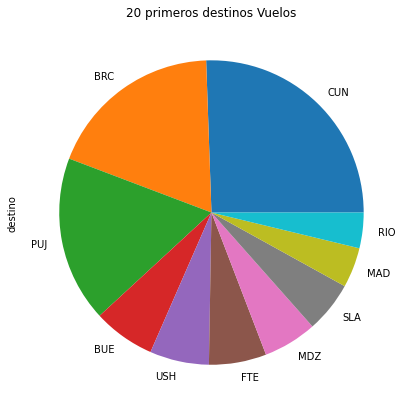

In [47]:
vuelos['destino'].value_counts().head(10).plot.pie(grid=True,figsize=(20,7),title='20 primeros destinos Vuelos')

In [49]:
hoteles.head()

,agy,vertical,resultado,origen,destino,hotel,in,otro
0,calipsoviajes,hoteles,resultados,7200,0,playa-del-carmenriviera-maya-mexico,03-02-2021,05-02-2021
1,calipsoviajes,hoteles,resultados,3930,0,isla-mujeres-mexico,31-01-2021,02-02-2021
2,calipsoviajes,hoteles,resultados,1078,0,holbox-mexico,30-01-2021,31-01-2021
3,delfos,hoteles,resultados,7753,0,rio-de-janeiro-brasil,13-03-2021,21-03-2021
4,calipsoviajes,hoteles,resultados,9486,0,tulum-mexico,08-02-2021,10-02-2021


<AxesSubplot:title={'center':'20 primeros destinos hoteleros'}, ylabel='hotel'>

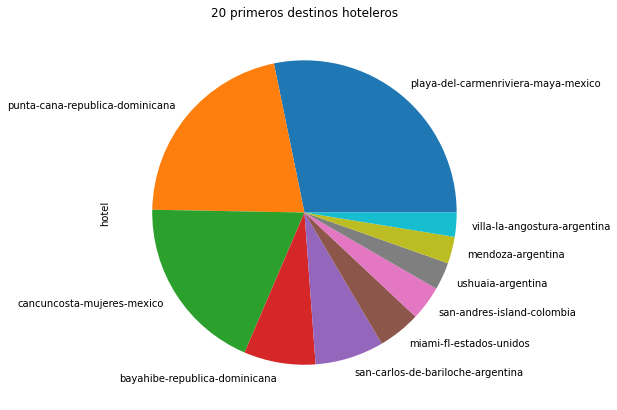

In [50]:
hoteles['hotel'].value_counts().head(10).plot.pie(grid=True,figsize=(20,7),title='20 primeros destinos hoteleros')

<AxesSubplot:title={'center':'20 primeros paquetes'}, ylabel='destino'>

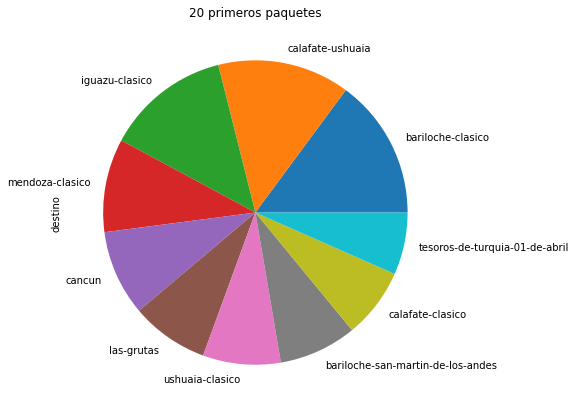

In [73]:
producto['destino'].value_counts().head(10).plot.pie(grid=True,figsize=(20,7),title='20 primeros paquetes')

In [75]:
vuelo_pordestino=vuelos.groupby('destino').apply(sum)
vuelo_pordestino.head()

destino           
ADZ      agy          balearesviajesyturismodelfosdipviajesdipviajes...
         vertical     vuelosvuelosvuelosvuelosvuelosvuelosvuelosvuel...
         resultado    resultadosresultadosresultadosresultadosresult...
         origen              ASUEZEBUEBUEBUECORCORCORCORCORCORCORBUEBUE
         destino             ADZADZADZADZADZADZADZADZADZADZADZADZADZADZ
dtype: object

In [58]:
vuelos.dropna()

,agy,vertical,resultado,origen,destino,hotel,in,otro
30,camilalopez,vuelos,resultados,BUE,FTE,31-01-2021,05-02-2021,adultos
82,ceiboviajes,vuelos,resultados,BUE,PUJ,28-02-2021,04-03-2021,adultos
123,avallone,vuelos,resultados,MDZ,CUN,11-07-2021,19-07-2021,adultos
126,benzaquenviajesyturismo,vuelos,resultados,BUE,CUN,17-03-2021,29-03-2021,adultos
130,ceiboviajes,vuelos,resultados,BUE,PUJ,22-02-2021,28-02-2021,adultos
...,...,...,...,...,...,...,...,...
4090,zoluviajes,vuelos,resultados,BUE,CRD,01-04-2021,08-04-2021,adultos
4092,zoom,vuelos,resultados,BUE,USH,01-02-2021,11-02-2021,adultos
4093,zoom,vuelos,resultados,BUE,USH,02-02-2021,11-02-2021,adultos
4094,zoom,vuelos,resultados,BUE,USH,05-02-2021,11-02-2021,adultos


In [14]:
!pwd

/home/marco/Bash_data_analytics


In [28]:
destinos=pd.read_csv('~/datasets/serie-tiempo-turismo-emisivo-mensual.csv')

In [29]:
destinos

,indice_tiempo,aerea_bolivia,aerea_brasil,aerea_chile,aerea_paraguay,aerea_uruguay,aerea_ee_uu_y_canada,aerea_resto_de_america,aerea_europa,aerea_resto_del_mundo,...,terrestre_resto_del_mundo,fluvial_maritima_bolivia,fluvial_maritima_brasil,fluvial_maritima_chile,fluvial_maritima_paraguay,fluvial_maritima_uruguay,fluvial_maritima_ee_uu_y_canada,fluvial_maritima_resto_de_america,fluvial_maritima_europa,fluvial_maritima_resto_del_mundo
0,2016-01,4206.6,105255.5,27596.7,3097.2,15872.2,54300.1,77403.4,31531.4,12736.0,...,234.0,6496.0,28413.2,11519.4,9920.3,102277.6,1210.0,334.1,733.0,84.8
1,2016-02,6291.9,101113.6,28971.2,2608.4,12398.4,61133.9,86252.3,44764.1,15560.4,...,193.0,4774.0,28483.9,12530.4,9692.6,100631.6,718.0,1080.3,369.1,116.5
2,2016-03,4228.9,98508.2,25864.6,2329.2,6995.7,71040.0,70331.5,45269.1,15909.9,...,193.2,6323.0,11479.7,4854.0,7566.2,63288.7,95.0,184.3,50.9,16.1
3,2016-04,3202.3,66582.2,22702.1,2851.8,5045.3,64893.8,68378.6,44043.4,14871.5,...,81.5,5602.0,4626.5,136.7,6473.7,25137.2,114.9,249.4,56.6,17.9
4,2016-05,2899.0,49208.8,24858.8,3485.7,5516.0,77011.9,67466.0,59305.7,12396.1,...,11.9,7407.0,6971.6,41.6,8086.6,26017.8,140.5,342.8,107.8,14.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2020-10,1348.0,1359.0,765.0,359.0,191.0,4756.0,1988.0,4293.0,56.0,...,0.0,0.0,0.0,0.0,0.0,1302.0,0.0,0.0,0.0,0.0
58,2020-11,1810.2,4029.0,2721.0,957.7,291.7,8956.9,4165.6,5633.5,60.3,...,0.0,0.0,2.0,0.0,0.0,1697.0,0.0,0.0,0.0,0.0
59,2020-12,2927.2,5361.1,6477.2,4497.4,248.3,12925.1,9149.1,11123.6,159.1,...,0.0,0.0,1.0,0.0,1.0,2515.0,0.0,0.0,0.0,0.0
60,2021-01,1481.0,10859.9,5500.5,2297.2,186.0,15549.3,17529.1,4481.0,1420.1,...,0.0,0.0,0.0,0.0,0.0,1732.0,0.0,0.0,0.0,0.0


In [30]:
destinos=pd.DataFrame(destinos)

In [31]:
destinos.describe()

,aerea_bolivia,aerea_brasil,aerea_chile,aerea_paraguay,aerea_uruguay,aerea_ee_uu_y_canada,aerea_resto_de_america,aerea_europa,aerea_resto_del_mundo,terrestre_bolivia,...,terrestre_resto_del_mundo,fluvial_maritima_bolivia,fluvial_maritima_brasil,fluvial_maritima_chile,fluvial_maritima_paraguay,fluvial_maritima_uruguay,fluvial_maritima_ee_uu_y_canada,fluvial_maritima_resto_de_america,fluvial_maritima_europa,fluvial_maritima_resto_del_mundo
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,2986.004839,64349.079032,26952.895161,3644.206452,6413.453226,57160.796774,61976.756452,50617.175806,13156.262903,28272.779032,...,82.688710,5856.829032,8186.148387,1964.980645,9148.837097,44247.814516,302.900000,1161.587097,313.837097,47.970968
std,1426.119989,38885.286364,16414.522291,1590.399272,5261.461080,26505.337098,30149.648955,28709.905971,7300.321589,16805.224436,...,87.251023,3400.633470,8142.066974,3991.956038,5498.015172,34612.385800,379.043589,1838.278573,426.369544,71.235790
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2340.275000,48299.575000,16450.400000,3073.050000,3854.850000,53335.750000,59298.275000,35717.025000,10951.200000,21458.750000,...,19.225000,4758.250000,3813.600000,17.375000,7665.000000,24742.775000,64.650000,160.150000,51.325000,0.250000
50%,3019.050000,62890.900000,25210.350000,4053.100000,5543.150000,67617.600000,67596.650000,49360.000000,14158.050000,29481.100000,...,53.200000,6150.100000,5458.000000,49.550000,9525.500000,35324.200000,132.400000,437.900000,155.750000,20.700000
75%,3820.325000,88197.125000,41787.275000,4703.700000,7402.450000,74823.050000,79823.600000,79833.375000,17710.850000,38344.125000,...,120.275000,7611.750000,11376.650000,1001.975000,12175.900000,59483.450000,476.575000,1306.575000,375.400000,59.975000
max,6291.900000,147948.400000,57621.500000,6404.000000,26717.600000,86289.800000,104301.500000,98722.800000,29964.200000,63329.700000,...,383.700000,13418.000000,29955.300000,13313.200000,23837.800000,133731.200000,1767.500000,10728.700000,2017.400000,335.800000


In [32]:
destinos.columns

Index(['indice_tiempo', 'aerea_bolivia', 'aerea_brasil', 'aerea_chile',
       'aerea_paraguay', 'aerea_uruguay', 'aerea_ee_uu_y_canada',
       'aerea_resto_de_america', 'aerea_europa', 'aerea_resto_del_mundo',
       'terrestre_bolivia', 'terrestre_brasil', 'terrestre_chile',
       'terrestre_paraguay', 'terrestre_uruguay', 'terrestre_ee_uu_y_canada',
       'terrestre_resto_de_america', 'terrestre_europa',
       'terrestre_resto_del_mundo', 'fluvial_maritima_bolivia',
       'fluvial_maritima_brasil', 'fluvial_maritima_chile',
       'fluvial_maritima_paraguay', 'fluvial_maritima_uruguay',
       'fluvial_maritima_ee_uu_y_canada', 'fluvial_maritima_resto_de_america',
       'fluvial_maritima_europa', 'fluvial_maritima_resto_del_mundo'],
      dtype='object')

In [41]:
!cat /home/marco/datasets/serie-tiempo-turismo-emisivo-mensual.csv | tail

2020-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-07,196.7,163.4,289.2,231,14,639.5,799.3,1234.8,0,49,442,119,468,417,0,0,0,0,0,0,0,2,374,0,0,0,0
2020-08,127.6,388.4,144.4,104.8,59.7,827.9,333.9,1511.9,118.4,48,430,205,546,525,0,0,0,0,0,0,0,7,584,0,0,0,0
2020-09,583.6,758.1,414,518.1,81.3,1853.2,970,3637.2,136.5,87,414,106,26,678,0,0,0,0,0,0,0,0,779,0,0,0,0
2020-10,1348,1359,765,359,191,4756,1988,4293,56,59,480,341,68,1135,0,0,0,0,0,0,0,0,1302,0,0,0,0
2020-11,1810.2,4029,2721,957.7,291.7,8956.9,4165.6,5633.5,60.3,126,694,602,77,1720,0,0,0,0,0,2,0,0,1697,0,0,0,0
2020-12,2927.2,5361.1,6477.2,4497.4,248.3,12925.1,9149.1,11123.6,159.1,126,994,3091,389,2843,0,0,0,0,0,1,0,1,2515,0,0,0,0
2021-01,1481,10859.9,5500.5,2297.2,186,15549.3,17529.1,4481,1420.1,97,1020,987,73,1278,0,0,0,0,0,0,0,0,1732,0,0,0,0
2021-02,2943,7778,4916,2916,233,14672.1,19420.9,4239,649,111,876,864,78,1042,0,0,0,0,0,0,0,0,3178,0,0,0,0


In [35]:
destinos.tail(8)

,indice_tiempo,aerea_bolivia,aerea_brasil,aerea_chile,aerea_paraguay,aerea_uruguay,aerea_ee_uu_y_canada,aerea_resto_de_america,aerea_europa,aerea_resto_del_mundo,...,terrestre_resto_del_mundo,fluvial_maritima_bolivia,fluvial_maritima_brasil,fluvial_maritima_chile,fluvial_maritima_paraguay,fluvial_maritima_uruguay,fluvial_maritima_ee_uu_y_canada,fluvial_maritima_resto_de_america,fluvial_maritima_europa,fluvial_maritima_resto_del_mundo
54,2020-07,196.7,163.4,289.2,231.0,14.0,639.5,799.3,1234.8,0.0,...,0.0,0.0,0.0,0.0,2.0,374.0,0.0,0.0,0.0,0.0
55,2020-08,127.6,388.4,144.4,104.8,59.7,827.9,333.9,1511.9,118.4,...,0.0,0.0,0.0,0.0,7.0,584.0,0.0,0.0,0.0,0.0
56,2020-09,583.6,758.1,414.0,518.1,81.3,1853.2,970.0,3637.2,136.5,...,0.0,0.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0
57,2020-10,1348.0,1359.0,765.0,359.0,191.0,4756.0,1988.0,4293.0,56.0,...,0.0,0.0,0.0,0.0,0.0,1302.0,0.0,0.0,0.0,0.0
58,2020-11,1810.2,4029.0,2721.0,957.7,291.7,8956.9,4165.6,5633.5,60.3,...,0.0,0.0,2.0,0.0,0.0,1697.0,0.0,0.0,0.0,0.0
59,2020-12,2927.2,5361.1,6477.2,4497.4,248.3,12925.1,9149.1,11123.6,159.1,...,0.0,0.0,1.0,0.0,1.0,2515.0,0.0,0.0,0.0,0.0
60,2021-01,1481.0,10859.9,5500.5,2297.2,186.0,15549.3,17529.1,4481.0,1420.1,...,0.0,0.0,0.0,0.0,0.0,1732.0,0.0,0.0,0.0,0.0
61,2021-02,2943.0,7778.0,4916.0,2916.0,233.0,14672.1,19420.9,4239.0,649.0,...,0.0,0.0,0.0,0.0,0.0,3178.0,0.0,0.0,0.0,0.0


In [46]:
destinos[['indice_tiempo','aerea_ee_uu_y_canada','aerea_europa']].tail(18).plt

,indice_tiempo,aerea_ee_uu_y_canada,aerea_europa
44,2019-09,69581.6,87365.5
45,2019-10,69714.7,81075.7
46,2019-11,59631.3,49370.9
47,2019-12,51881.1,37101.3
48,2020-01,47391.9,42972.5
49,2020-02,60028.3,49720.3
50,2020-03,20400.3,21344.7
51,2020-04,0.0,0.0
52,2020-05,0.0,0.0
53,2020-06,0.0,0.0


<AxesSubplot:title={'center':'Emisivo aéreos TOTAL ARGENTINA SEP2020 a FEB2021'}, xlabel='indice_tiempo'>

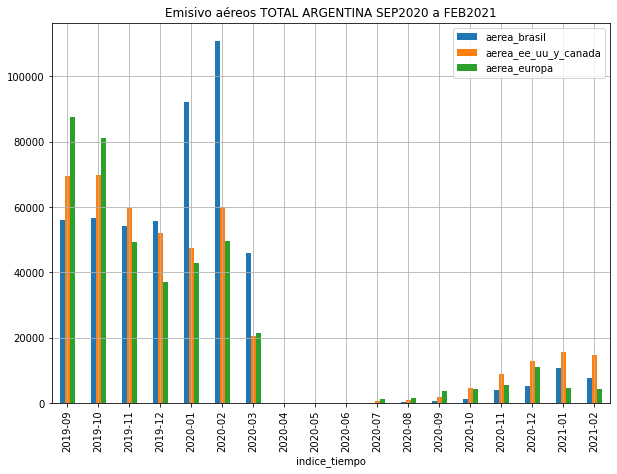

In [53]:
#TI.sort_values(by=['Coef'],ascending=[False]).head(20).plot.bar(title='Semana 44 2018 - Indice creciente',grid=True,figsize=(20,7),x='Tramo',colormap='Set1_r')
destinos[['indice_tiempo','aerea_brasil','aerea_ee_uu_y_canada','aerea_europa']].tail(18).plot.bar(title="Emisivo aéreos TOTAL ARGENTINA SEP2020 a FEB2021", figsize=(10,7),grid=True, x='indice_tiempo')